In [ ]:
# Management Modules
import os
import random
from glob import glob
from tqdm import tqdm
from collections import Counter

In [ ]:
# Data loading and transformation
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Pre-trained models
from tensorflow.keras.applications import ResNet50V2, ResNet152V2, MobileNetV2, Xception

In [ ]:
# Model Layers
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [ ]:
# Model Checkpoints
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 50.8 MB/s eta 0:00:00


In [ ]:
# Model Hyertunig and Metrices
from keras_tuner.tuners import Hyperband
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the root file path
directory_path = '/content/drive/MyDrive/DeepLearning/farm_insects'
Batch_size =32
N_CLASSES = 15
IMAGE_SIZE = (224,224,3)

In [ ]:
# Collect the class names
class_names = os.listdir(directory_path)

# Show the information
print(f"Number of Classes: {N_CLASSES}")
print("Class Names:")
for index, name in enumerate(class_names):
    print(f"{index + 1:2}. {name}")

Number of Classes: 15
Class Names:
 1. Armyworms
 2. Africanized Honey Bees (Killer Bees)
 3. Corn Borers
 4. Colorado Potato Beetles
 5. Corn Earworms
 6. Aphids
 7. Brown Marmorated Stink Bugs
 8. Fall Armyworms
 9. Citrus Canker
10. Cabbage Loopers
11. Thrips
12. Fruit Flies
13. Spider Mites
14. Western Corn Rootworms
15. Tomato Hornworms


In [ ]:
total_image_count = 0

for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            total_image_count += 1

print(f"Total number of images in all subdirectories: {total_image_count}")


Total number of images in all subdirectories: 1591


In [ ]:
import os
from tabulate import tabulate

In [ ]:
subdirectories = []
data = []

for root, dirs, files in os.walk(directory_path):
    image_count = 0
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            image_count += 1
    if image_count > 0:
        subdirectory_name = os.path.basename(root)
        subdirectories.append(subdirectory_name)
        data.append([subdirectory_name, image_count])

# Define table headers
headers = ["Subdirectory", "Total Images"]

# Create and print the table
table = tabulate(data, headers, tablefmt="grid")
print(table)

+--------------------------------------+----------------+
| Subdirectory                         |   Total Images |
+======================================+================+
| Armyworms                            |             96 |
+--------------------------------------+----------------+
| Africanized Honey Bees (Killer Bees) |             97 |
+--------------------------------------+----------------+
| Corn Borers                          |            115 |
+--------------------------------------+----------------+
| Colorado Potato Beetles              |            112 |
+--------------------------------------+----------------+
| Corn Earworms                        |            110 |
+--------------------------------------+----------------+
| Aphids                               |             88 |
+--------------------------------------+----------------+
| Brown Marmorated Stink Bugs          |            114 |
+--------------------------------------+----------------+
| Fall Armywor

In [ ]:
# Compute the sample size for each class
class_sample_size = [len(os.listdir(directory_path + "/" + class_name))
 for class_name in class_names]

data_distribution_df = pd.DataFrame({
    "Class Names": class_names,
    "Data Size": class_sample_size
})

In [ ]:
# Visualize the class distribution
fig = px.bar(
    data_frame=data_distribution_df,
    x="Class Names",
    y="Data Size",
    text="Data Size",
    title="Class Distribution of Insects in the Dataset",
    color_discrete_sequence=px.colors.qualitative.D3,
    height=600,
)

# Set axis labels and adjust layout
fig.update_layout(
    xaxis_title="Class Names",
    yaxis_title="Data Size",
    yaxis_tickformat="d",
    yaxis=dict(showgrid=False),
    showlegend=False,
)

# Show the plot
fig.show()

In [ ]:
all_image_paths = []
class_labels = []

# List comprehensions to collect image paths and class labels
for class_name in os.listdir(directory_path):
    class_path = os.path.join(directory_path, class_name)
    if os.path.isdir(class_path):
        all_image_paths.extend([os.path.join(class_path, image) for image in os.listdir(class_path)])
        class_labels.extend([class_name] * len(os.listdir(class_path)))

# Print the collected image paths and class labels (for verification)
for path, label in zip(all_image_paths, class_labels):
    print(f"Image path: {path}, Class: {label}")


Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_104.png, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_106.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_105.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_107.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_101.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_1.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_10.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_4.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_12.jpg, Class: Armyworms
Image path: /content/drive/MyDrive/DeepLearning/farm_insects/Armyworms/Image_44

In [ ]:
from sklearn.model_selection import train_test_split

# Perform the initial split
train_images, valid_test_images, train_labels, valid_test_labels = train_test_split(
    all_image_paths, class_labels, train_size=0.6, test_size=0.4, stratify=class_labels)

# Further split valid_test_images into validation and test sets
valid_images, test_images, valid_labels, test_labels = train_test_split(
    valid_test_images, valid_test_labels, train_size=0.75, test_size=0.25, stratify=valid_test_labels)

In [ ]:
# Print the sizes of the resulting sets (for verification)
print("Train size:", len(train_images))
print("Validation size:", len(valid_images))
print("Test size:", len(test_images))

Train size: 954
Validation size: 477
Test size: 160


In [ ]:
class FarmInsects:
    """
    A class for loading and processing farm insect images dataset.
    """

    def __init__(self, class_names: list, n_classes: int, image_size: tuple = (256, 256, 3)):

        self.image_size = image_size
        self.class_names = class_names
        self.n_classes = n_classes

    def load_image(self, image_path: str) -> tf.Tensor:

        image_file = tf.io.read_file(image_path)
        image = tf.image.decode_image(image_file, channels=3)
        image = tf.image.resize(image, self.image_size[:2])
        image = image / 255.

        return image

    def extract_label(self, image_path: str, names: bool = False) -> int or str:

        name = os.path.split(image_path)[0].split("/")[-1]
        if names:
            return name
        else:
            label = self.class_names.index(name)
            return label

    def load_data(self, image_paths: list, desc: str = "Loading", one_hot: bool = True, names: bool = False) -> tuple:

        self.images = np.empty((len(image_paths),) + self.image_size, dtype=np.float32)

        if names:
            self.labels = []
        else:
            self.labels = np.empty((len(image_paths),), dtype=np.int32)

        for index, path in tqdm(enumerate(image_paths), desc=desc):
            image = self.load_image(image_path=path)
            label = self.extract_label(image_path=path, names=names)
            self.images[index] = image

            if names:
                self.labels.append(label)
            else:
                self.labels[index] = label

        if one_hot and not names:
            one_hot_labels = tf.one_hot(self.labels, depth=self.n_classes)
            return self.images, one_hot_labels
        else:
            return self.images, self.labels



In [ ]:
# Initialize dataset
farm_data = FarmInsects(class_names=class_names, n_classes=N_CLASSES, image_size=IMAGE_SIZE)

# Load Training Data
trainXs, trainYs = farm_data.load_data(image_paths=train_images, desc="Training Data")

# Load testing Data
testXs, testYs = farm_data.load_data(image_paths=test_images, desc="Testing Data")

# Load validation Data
validXs, validYs = farm_data.load_data(image_paths=valid_images, desc="Validation Data")

Training Data: 954it [06:19,  2.52it/s]
Testing Data: 160it [00:59,  2.69it/s]
Validation Data: 477it [03:05,  2.57it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape
input_shape = (256, 256)  # Adjust the dimensions as needed

# Initialize the data generator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Rescale pixel values to the range [0, 1]
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Apply zoom transformation
    horizontal_flip=True,     # Apply horizontal flip
    validation_split=0.2,     # Split data into training and validation sets
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Rescale pixel values for testing

# If you want to apply data augmentation to a set of images
datagen = ImageDataGenerator(
    rescale=1.0 / 255,        # Rescale pixel values to the range [0, 1]
    rotation_range=20,       # Rotate the image by up to 20 degrees
    width_shift_range=0.2,   # Shift the width of the image
    height_shift_range=0.2,  # Shift the height of the image
    shear_range=0.2,         # Apply shear transformation
    zoom_range=0.2,          # Apply zoom transformation
    horizontal_flip=True,    # Apply horizontal flip
    fill_mode='nearest'      # Fill in missing pixels with the nearest available pixel
)

In [ ]:
for folder in os.listdir(directory_path):
    if os.path.isdir(os.path.join(directory_path, folder)):
        for file in os.listdir(os.path.join(directory_path, folder)):
            file_path = os.path.join(directory_path, folder, file)
            all_image_paths.append(file_path)
            class_labels.append(folder)

# Create a DataFrame with file paths and labels
df = pd.DataFrame({'filepaths': all_image_paths, 'labels': class_labels})


In [ ]:
df.head()

,filepaths,labels
0,/content/drive/MyDrive/DeepLearning/farm_insec...,Armyworms
1,/content/drive/MyDrive/DeepLearning/farm_insec...,Armyworms
2,/content/drive/MyDrive/DeepLearning/farm_insec...,Armyworms
3,/content/drive/MyDrive/DeepLearning/farm_insec...,Armyworms
4,/content/drive/MyDrive/DeepLearning/farm_insec...,Armyworms


In [ ]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [ ]:
import tensorflow as tf
# method is suitable for cases where you have a directory structure
# Set a random seed for reproducibility
seed = 42

# Define the data loading parameters
data_params = {
    "directory": directory_path,
    "label_mode": "categorical",
    "image_size": (224, 224),
    "shuffle": True,
    "seed": seed,
    "validation_split": 0.3,
}

# Load the training data
train_data = tf.keras.utils.image_dataset_from_directory(subset="training", **data_params).cache().prefetch(tf.data.AUTOTUNE)

# Load the test data
test_data = tf.keras.utils.image_dataset_from_directory(subset="validation", **data_params).cache().prefetch(tf.data.AUTOTUNE)


Found 1591 files belonging to 15 classes.
Using 1114 files for training.
Found 1591 files belonging to 15 classes.
Using 477 files for validation.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications import ResNet50V2, ResNet152V2, MobileNetV2, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2

# Define the number of classes in your dataset
num_classes = 15  # Replace with the actual number of classes

# Load the ResNet50V2 model with pre-trained weights
resnet50_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own custom output layers for your specific task
output = tf.keras.layers.GlobalAveragePooling2D()(resnet50_model.output)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(output)

# Create the fine-tuned model
model = tf.keras.Model(inputs=resnet50_model.inputs, outputs=output)

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


94668760/94668760 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                             

In [ ]:
# train the model using your training and validation datasets
history = model.fit(trainXs, trainYs, validation_data=(validXs, validYs), epochs=20)

Epoch 1/20
30/30 [==============================] - 730s 23s/step - loss: 2.4086 - accuracy: 0.2799 - val_loss: 355.5274 - val_accuracy: 0.0713
Epoch 2/20
30/30 [==============================] - 683s 23s/step - loss: 2.0124 - accuracy: 0.3700 - val_loss: 218.4159 - val_accuracy: 0.0734
Epoch 3/20
30/30 [==============================] - 680s 23s/step - loss: 1.7094 - accuracy: 0.4602 - val_loss: 6.9780 - val_accuracy: 0.1572
Epoch 4/20
30/30 [==============================] - 682s 23s/step - loss: 1.1847 - accuracy: 0.6205 - val_loss: 32.2666 - val_accuracy: 0.1447
Epoch 5/20
30/30 [==============================] - 690s 23s/step - loss: 1.0443 - accuracy: 0.6855 - val_loss: 4.6664 - val_accuracy: 0.2683
Epoch 6/20
30/30 [==============================] - 699s 23s/step - loss: 0.7718 - accuracy: 0.7547 - val_loss: 11.7724 - val_accuracy: 0.1845
Epoch 7/20
30/30 [==============================] - 700s 23s/step - loss: 0.5491 - accuracy: 0.8187 - val_loss: 2.9881 - val_accuracy: 0.2935


In [ ]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
model.save('/content/drive/MyDrive/DeepLearning/final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepLearning/final_model.h5')  # Replace with your actual model path


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepLearning/final_model.h5')  # Replace with the actual path to your model file

# Function to predict an image given its file path
def predict_image(file_path):
    # Load and preprocess the image
    img = Image.open(file_path).resize((224, 224))
    img = np.array(img) / 255.0  # Normalize the image
    img = img[np.newaxis, ...]  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)

    return class_names[predicted_class]

# Provide the file path to the image you want to predict
image_path = '/content/drive/MyDrive/DeepLearning/p_images/img_2.jpg'  # Replace with the actual image file path
predicted_class_name = predict_image(image_path)
print(f"Predicted Class: {predicted_class_name}")


1/1 [==============================] - 1s 1s/step
Predicted Class: Corn Borers


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have test data (testXs, testYs)
predictions = model.predict(testXs)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# Calculate accuracy
accuracy = accuracy_score(np.argmax(testYs, axis=1), predicted_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(testYs, axis=1), predicted_classes, average='weighted')
recall = recall_score(np.argmax(testYs, axis=1), predicted_classes, average='weighted')
f1 = f1_score(np.argmax(testYs, axis=1), predicted_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


5/5 [==============================] - 33s 6s/step
Accuracy: 51.88%
Precision: 0.56
Recall: 0.52
F1 Score: 0.52


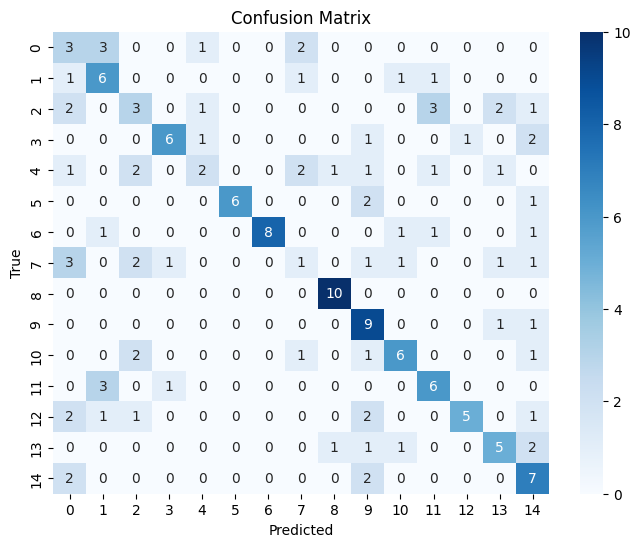

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have test data (testXs, testYs) and predicted_classes as defined earlier
true_classes = np.argmax(testYs, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()